##### Proyek Data Sains
Kelas : IF - E  
NIM / Nama  
123230010 / Rendi Wahyu N  
123230013 / Valentino Abinata  
123230018 / Imam Khusain  

Import library yang dibutuhkan

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Baca dataset Heart Failure Clinical Records, yang terdapat dalam "https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure/data"

In [33]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
display(df.sample(9))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
200,63.0,1,1767,0,45,0,73000.0,0.7,137,1,0,186,0
116,60.0,1,96,1,60,1,271000.0,0.7,136,0,0,94,0
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33,1
280,70.0,0,2695,1,40,0,241000.0,1.0,137,1,0,247,0
113,70.0,1,143,0,60,0,351000.0,1.3,137,0,0,90,1
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94,0
42,70.0,0,571,1,45,1,185000.0,1.2,139,1,1,33,1
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201,0
70,41.0,0,148,0,40,0,374000.0,0.8,140,1,1,68,0


Data Dictionary

In [34]:
print('Informasi Umum Dataset:')
df.info()

Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30

Jumlah Data, Missing Values, dan Duplicate

In [35]:
print('Jumlah Data: ', len(df), '\n')
print('Jumlah Missing Values per Kolom:', '\n', df.isna().sum(), '\n')
print('Jumlah Baris Data Duplikat: ', df.duplicated().sum(), '\n')

Jumlah Data:  299 

Jumlah Missing Values per Kolom: 
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64 

Jumlah Baris Data Duplikat:  0 



Deklarasi Variabel

In [36]:
categorical_columns = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"] 
numerical_columns = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time", "DEATH_EVENT"]

Unique Value pada Variabel Kategori

In [37]:
for col in categorical_columns:
    if col in df.columns:
        print(f"Frekuensi nilai untuk kolom '{col}':\n{df[col].value_counts()}")


Frekuensi nilai untuk kolom 'anaemia':
anaemia
0    170
1    129
Name: count, dtype: int64
Frekuensi nilai untuk kolom 'diabetes':
diabetes
0    174
1    125
Name: count, dtype: int64
Frekuensi nilai untuk kolom 'high_blood_pressure':
high_blood_pressure
0    194
1    105
Name: count, dtype: int64
Frekuensi nilai untuk kolom 'sex':
sex
1    194
0    105
Name: count, dtype: int64
Frekuensi nilai untuk kolom 'smoking':
smoking
0    203
1     96
Name: count, dtype: int64


Variabel Kategorik

In [38]:
print("ANALISIS VARIABEL KATEGORIK (MODUS)")
print("==================================================")

for col in categorical_columns:
    mode_value = df[col].mode()[0]
    mode_count = df[col].value_counts().iloc[0]
    
    print(f"\n {col}:")
    print(f"   • Modus: {mode_value}")
    print(f"   • Frekuensi modus: {mode_count}")

ANALISIS VARIABEL KATEGORIK (MODUS)

 anaemia:
   • Modus: 0
   • Frekuensi modus: 170

 diabetes:
   • Modus: 0
   • Frekuensi modus: 174

 high_blood_pressure:
   • Modus: 0
   • Frekuensi modus: 194

 sex:
   • Modus: 1
   • Frekuensi modus: 194

 smoking:
   • Modus: 0
   • Frekuensi modus: 203


Variabel Numerik

In [39]:
print("\nANALISIS VARIABEL NUMERIK (STATISTIK DESKRIPTIF)")
print("==================================================")
print(df[numerical_columns].describe())


ANALISIS VARIABEL NUMERIK (STATISTIK DESKRIPTIF)
              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium        time  DEATH_EVENT  
count         299.00000    299.000000  299.000000    299.00000  
mean            1.39388    136.625418  130.260870      0.32107  
std             1.03451  

Deteksi Outlier dengan Visualisasi Box Plot

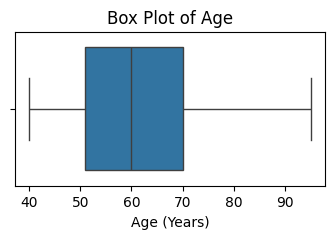

In [40]:
# Age
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['age'], showfliers=True)
plt.title('Box Plot of Age')
plt.xlabel('Age (Years)')
plt.show()

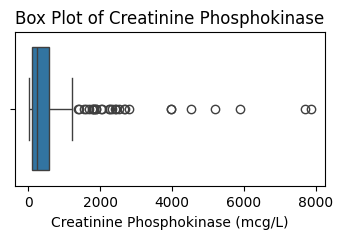

In [41]:
# Creatinine Phosphokinase
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['creatinine_phosphokinase'], showfliers=True)
plt.title('Box Plot of Creatinine Phosphokinase')
plt.xlabel('Creatinine Phosphokinase (mcg/L)')
plt.show()

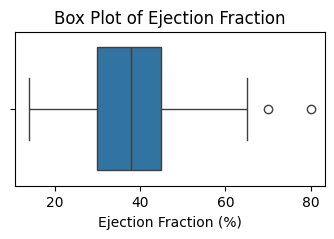

In [42]:
# Ejection Fraction
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['ejection_fraction'], showfliers=True)
plt.title('Box Plot of Ejection Fraction')
plt.xlabel('Ejection Fraction (%)')
plt.show()

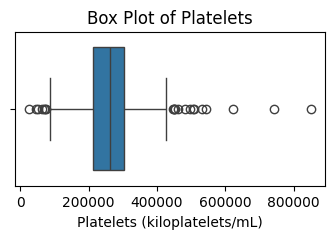

In [43]:
# Platelets
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['platelets'], showfliers=True)
plt.title('Box Plot of Platelets')
plt.xlabel('Platelets (kiloplatelets/mL)')
plt.show()

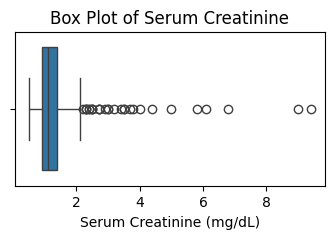

In [44]:
# Serum Creatinine
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['serum_creatinine'], showfliers=True)
plt.title('Box Plot of Serum Creatinine')
plt.xlabel('Serum Creatinine (mg/dL)')
plt.show()

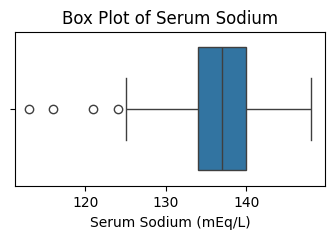

In [45]:
# Serum Sodium
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['serum_sodium'], showfliers=True)
plt.title('Box Plot of Serum Sodium')
plt.xlabel('Serum Sodium (mEq/L)')
plt.show()

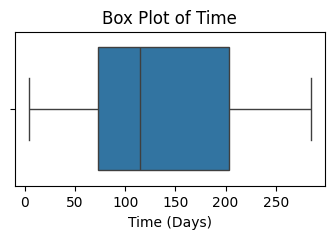

In [46]:
# Time
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['time'], showfliers=True)
plt.title('Box Plot of Time')
plt.xlabel('Time (Days)')
plt.show()

### EDA

Univariat EDA

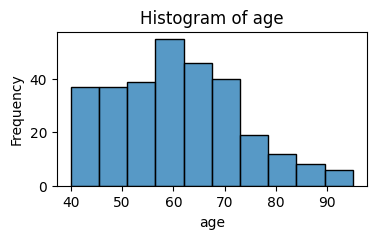

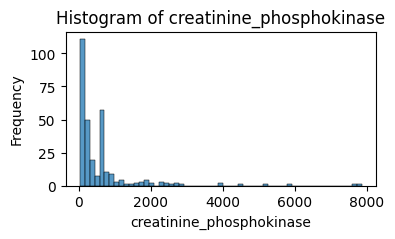

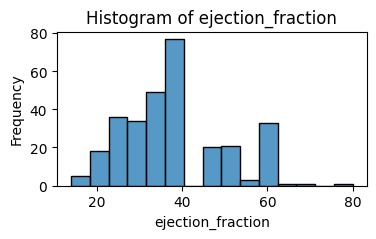

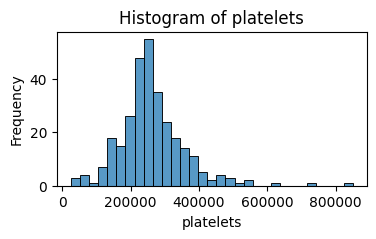

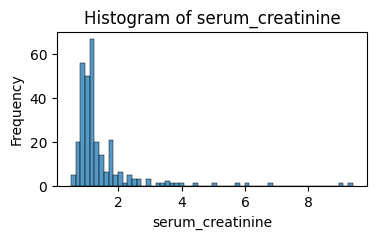

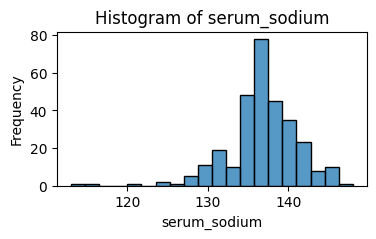

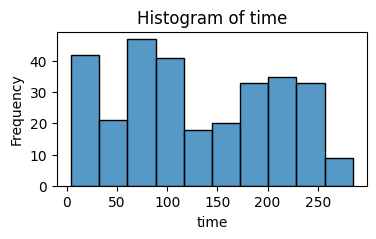

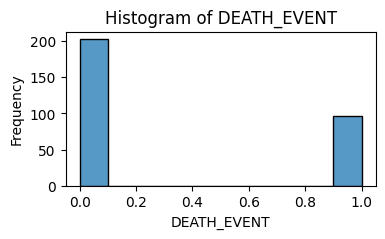

In [47]:
palette = sns.color_palette("Set2")[:2]

for column in numerical_columns:
    if column in df.columns:
        plt.figure(figsize=(4, 2))
        sns.histplot(df[column])
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

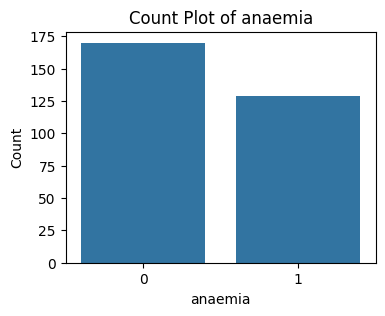

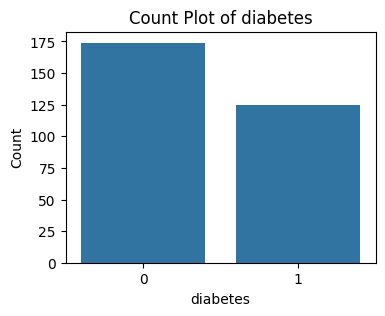

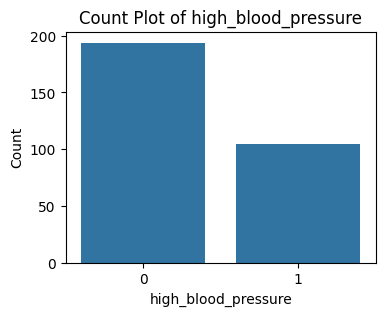

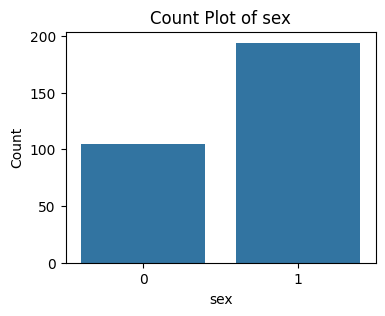

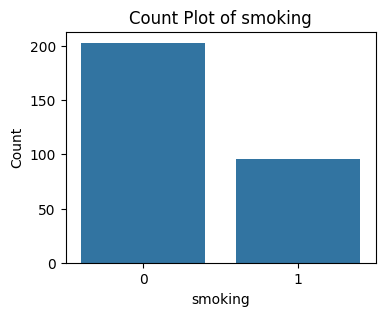

In [48]:
for col in categorical_columns:
    plt.figure(figsize=(4,3))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Bivariat EDA Kategorik

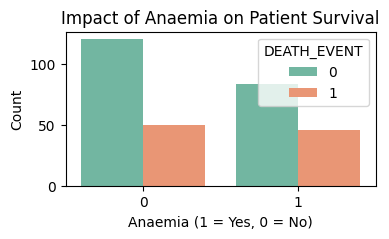

In [49]:
# 1. Anaemia
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x="anaemia", hue="DEATH_EVENT", palette=palette)
plt.title("Impact of Anaemia on Patient Survival")
plt.xlabel("Anaemia (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

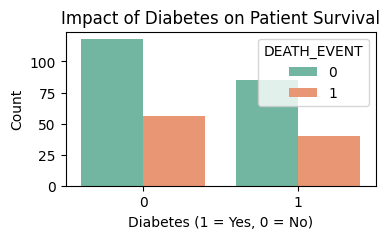

In [50]:
# 2. Diabetes
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x="diabetes", hue="DEATH_EVENT", palette=palette)
plt.title("Impact of Diabetes on Patient Survival")
plt.xlabel("Diabetes (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

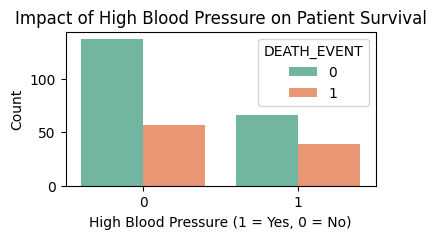

In [51]:
# 3. High Blood Pressure
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x="high_blood_pressure", hue="DEATH_EVENT", palette=palette)
plt.title("Impact of High Blood Pressure on Patient Survival")
plt.xlabel("High Blood Pressure (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

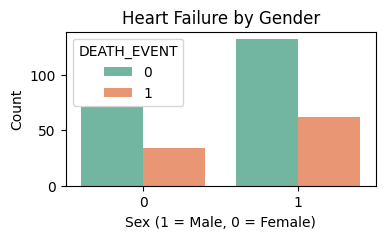

In [52]:
# 4. Sex
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x="sex", hue="DEATH_EVENT", palette=palette)
plt.title("Heart Failure by Gender")
plt.xlabel("Sex (1 = Male, 0 = Female)")
plt.ylabel("Count")
plt.show()

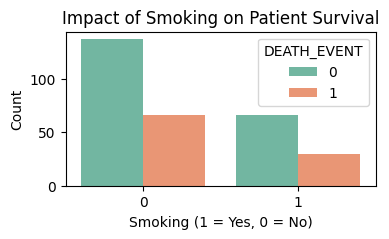

In [53]:
# 5. Smoking
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x="smoking", hue="DEATH_EVENT", palette=palette)
plt.title("Impact of Smoking on Patient Survival")
plt.xlabel("Smoking (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

Bivariat EDA Numerik

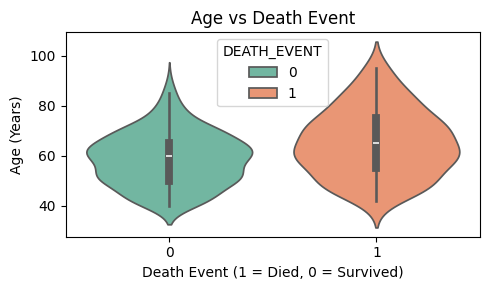

In [54]:
# 1. Age vs Death Event
plt.figure(figsize=(5, 3))
sns.violinplot(data=df, x="DEATH_EVENT",hue="DEATH_EVENT", y="age", palette=palette)
plt.title("Age vs Death Event")
plt.xlabel("Death Event (1 = Died, 0 = Survived)")
plt.ylabel("Age (Years)")
plt.tight_layout()
plt.show()

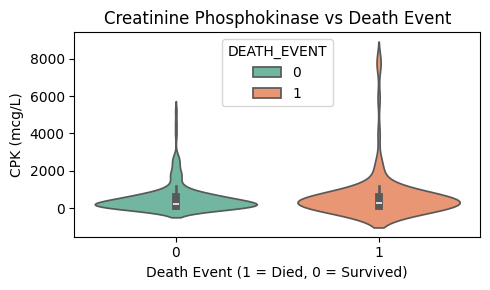

In [55]:
# 2. Creatinine Phosphokinase vs Death Event
plt.figure(figsize=(5, 3))
sns.violinplot(data=df, x="DEATH_EVENT",hue="DEATH_EVENT", y="creatinine_phosphokinase", palette=palette)
plt.title("Creatinine Phosphokinase vs Death Event")
plt.xlabel("Death Event (1 = Died, 0 = Survived)")
plt.ylabel("CPK (mcg/L)")
plt.tight_layout()
plt.show()

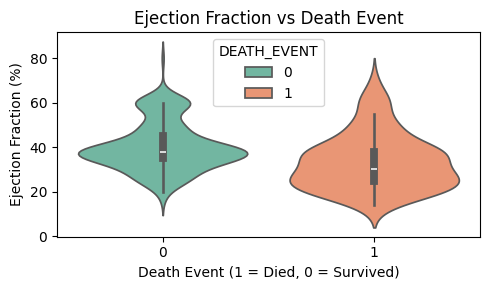

In [56]:
# 3. Ejection Fraction vs Death Event
plt.figure(figsize=(5, 3))
sns.violinplot(data=df, x="DEATH_EVENT",hue="DEATH_EVENT", y="ejection_fraction", palette=palette)
plt.title("Ejection Fraction vs Death Event")
plt.xlabel("Death Event (1 = Died, 0 = Survived)")
plt.ylabel("Ejection Fraction (%)")
plt.tight_layout()
plt.show()


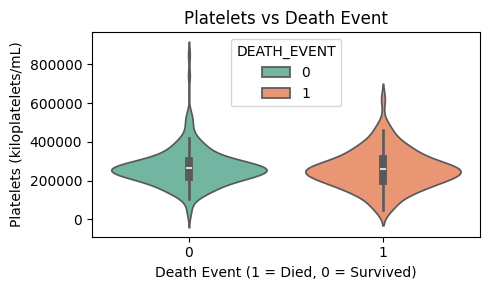

In [57]:
# 4. Platelets vs Death Event
plt.figure(figsize=(5, 3))
sns.violinplot(data=df, x="DEATH_EVENT",hue="DEATH_EVENT", y="platelets", palette=palette)
plt.title("Platelets vs Death Event")
plt.xlabel("Death Event (1 = Died, 0 = Survived)")
plt.ylabel("Platelets (kiloplatelets/mL)")
plt.tight_layout()
plt.show()

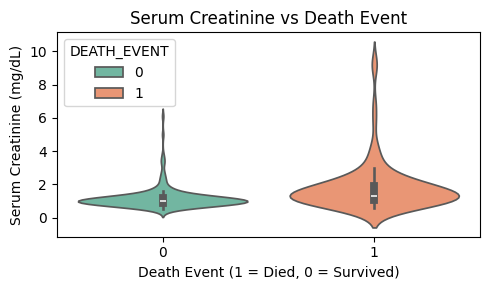

In [58]:
# 5. Serum Creatinine vs Death Event
plt.figure(figsize=(5, 3))
sns.violinplot(data=df, x="DEATH_EVENT",hue="DEATH_EVENT", y="serum_creatinine", palette=palette)
plt.title("Serum Creatinine vs Death Event")
plt.xlabel("Death Event (1 = Died, 0 = Survived)")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.tight_layout()
plt.show()

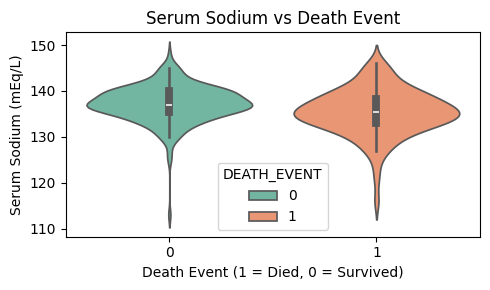

In [59]:
# 6. Serum Sodium vs Death Event
plt.figure(figsize=(5, 3))
sns.violinplot(data=df, x="DEATH_EVENT",hue="DEATH_EVENT", y="serum_sodium", palette=palette)
plt.title("Serum Sodium vs Death Event")
plt.xlabel("Death Event (1 = Died, 0 = Survived)")
plt.ylabel("Serum Sodium (mEq/L)")
plt.tight_layout()
plt.show()

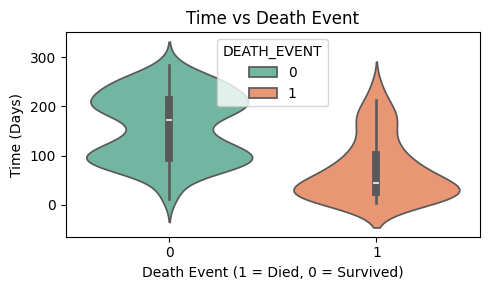

In [60]:
# 7. Time vs Death Event
plt.figure(figsize=(5, 3))
sns.violinplot(data=df, x="DEATH_EVENT",hue="DEATH_EVENT", y="time", palette=palette)
plt.title("Time vs Death Event")
plt.xlabel("Death Event (1 = Died, 0 = Survived)")
plt.ylabel("Time (Days)")
plt.tight_layout()
plt.show()

Multivariat EDA


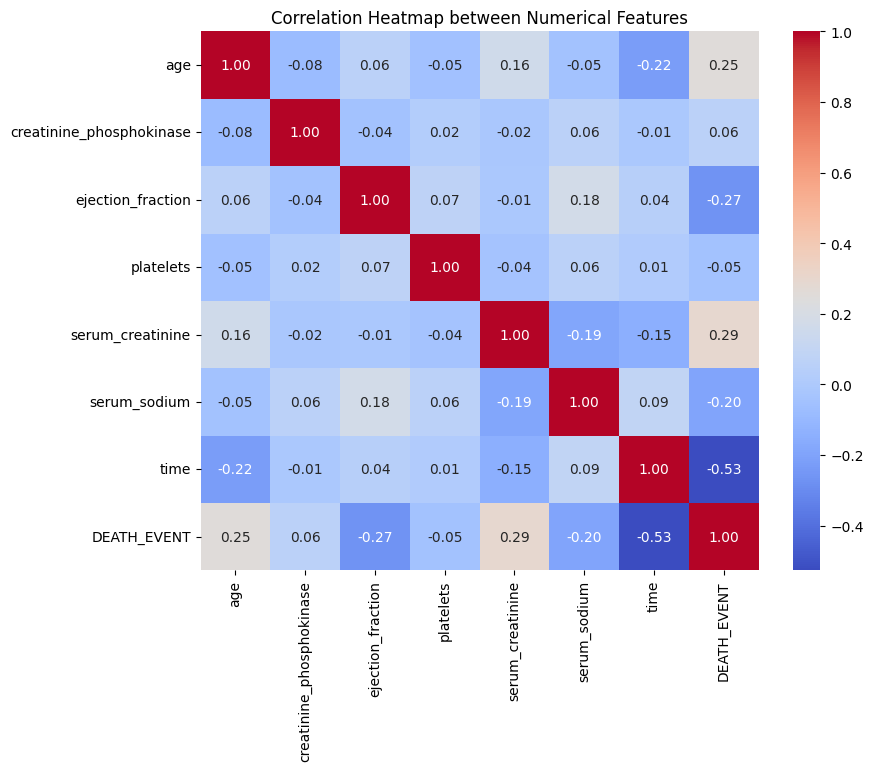

In [61]:
corr = df[numerical_columns].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap between Numerical Features")
plt.show()

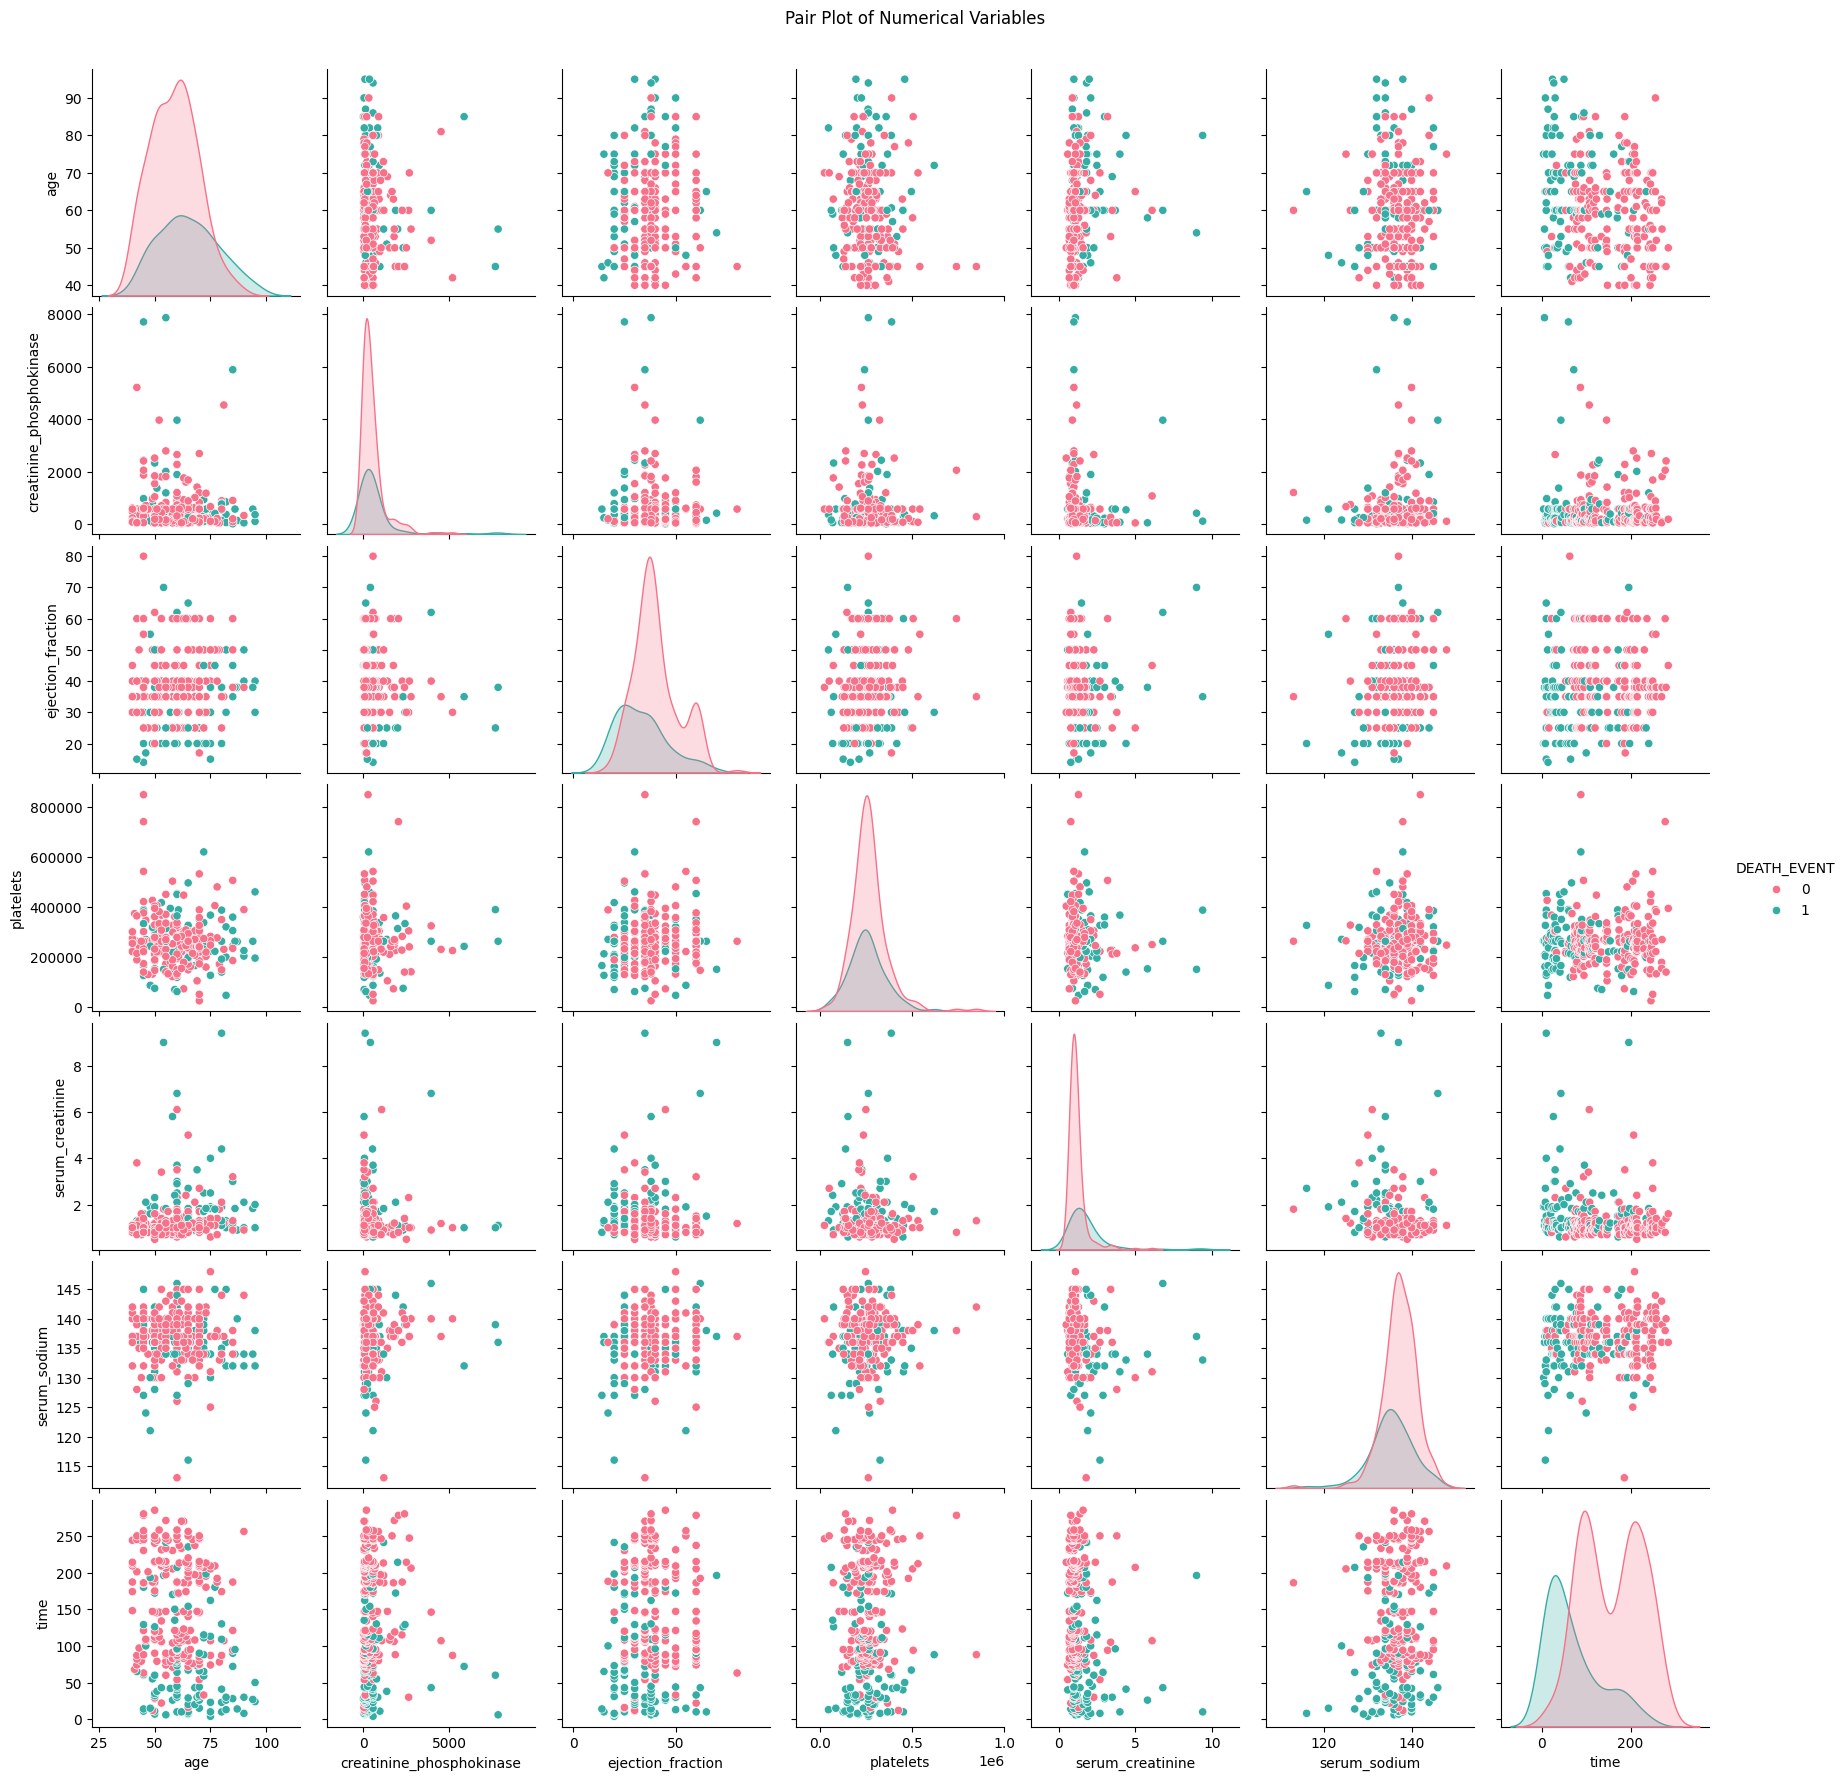

In [62]:
sns.pairplot(
    df[numerical_columns],
    hue='DEATH_EVENT',
    diag_kind='kde',
    palette='husl'
)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()